# Tree-Ring Exploration Data Analysis

In [1]:
# Import important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
plt.style.use('bmh')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

### Download the Tree-Ring Dataset

In [3]:
df1 = pd.read_csv('detrend v0.1.1 a.csv')
df2 = pd.read_csv('detrend v0.1.1 b.csv')

In [4]:
print(df1.shape)
print(df2.shape)

(874090, 12)
(759736, 12)


### Both files contain information about many species since 1951

In [5]:
df1.head()

,uid_project,uid_site,uid_tree,uid_radius,species,year,res.Lbai.normalized,latitude,longitude,SummerSMI,SummerSMI.t_1,Ecoregions
0,44,3881,24828,102408,ABIEAMA,1951,0.840,49.31,-123.04,70.24,78.40,196
1,44,3881,24828,102408,ABIEAMA,1952,-2.650,49.31,-123.04,82.79,70.24,196
2,44,3881,24828,102408,ABIEAMA,1953,0.273,49.31,-123.04,87.64,82.79,196
3,44,3881,24828,102408,ABIEAMA,1954,0.823,49.31,-123.04,86.09,87.64,196
4,44,3881,24828,102408,ABIEAMA,1955,3.131,49.31,-123.04,92.50,86.09,196


In [6]:
df2.head()

,uid_project,uid_site,uid_tree,uid_radius,species,year,res.Lbai.normalized,latitude,longitude,SummerSMI,SummerSMI.t_1,Ecoregions
0,1,5,21,21,PINUBAN,1986,0.195,54.52,-110.42,93.4,89.3,139
1,1,5,21,21,PINUBAN,1987,-0.239,54.52,-110.42,96.0,93.4,139
2,1,5,21,21,PINUBAN,1988,0.700,54.52,-110.42,92.9,96.0,139
3,1,5,21,21,PINUBAN,1989,-0.255,54.52,-110.42,88.5,92.9,139
4,1,5,21,21,PINUBAN,1990,-0.053,54.52,-110.42,82.4,88.5,139


### Dataset Explanation

|| Attribute  | Descrption  |
|---:|:-------------|:-----------|
| 1 | **uid_project**  |Researchers project. Could be relevant if we want to identify patterns of variations amongst the data contributors 
| 2 | **uid_site**|Site where trees were collected
| 3 | **uid_tree**|Tree number
| 4 | **uid_radius**|The number of samples by tree - Should only be one by tree, so can be discarded.
| 5 | **Species**|A 7 digits id for species
| 6 | **Year**|The year of ring measurement
| 7 | **res.Lbai.normalized**|This is the growth index, after removing the effect of tree age and tree size. It is the variable of interest.
| 8 | **Latitude**|Latitude in decimal degrees, sample location
| 9 | **Longitude**|Longitude in in decimal degrees, sample location
| 10 | **SummerSMI**|Summer drought aridity, not really of interest
| 11 | **SummerSMI.t_1**|Drought aridity of the summer previous to the growth year, not really of interest
| 12 | **Ecoregions**|Classification of Canada ‘s terrestrial land, not really of interest

In [7]:
# Get dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874090 entries, 0 to 874089
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   uid_project          874090 non-null  int64  
 1   uid_site             874090 non-null  int64  
 2   uid_tree             874090 non-null  int64  
 3   uid_radius           874090 non-null  int64  
 4   species              874090 non-null  object 
 5   year                 874090 non-null  int64  
 6   res.Lbai.normalized  874090 non-null  float64
 7   latitude             874090 non-null  float64
 8   longitude            874090 non-null  float64
 9   SummerSMI            874090 non-null  float64
 10  SummerSMI.t_1        874090 non-null  float64
 11  Ecoregions           874090 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 80.0+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759736 entries, 0 to 759735
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   uid_project          759736 non-null  int64  
 1   uid_site             759736 non-null  int64  
 2   uid_tree             759736 non-null  int64  
 3   uid_radius           759736 non-null  int64  
 4   species              759736 non-null  object 
 5   year                 759736 non-null  int64  
 6   res.Lbai.normalized  759736 non-null  float64
 7   latitude             758666 non-null  float64
 8   longitude            758666 non-null  float64
 9   SummerSMI            759736 non-null  float64
 10  SummerSMI.t_1        759736 non-null  float64
 11  Ecoregions           759736 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 69.6+ MB


### Combining both files in one only

In [9]:
frames = [df1, df2]
tree_ring_df = pd.concat(frames)

tree_ring_df

,uid_project,uid_site,uid_tree,uid_radius,species,year,res.Lbai.normalized,latitude,longitude,SummerSMI,SummerSMI.t_1,Ecoregions
0,44,3881,24828,102408,ABIEAMA,1951,0.840,49.31,-123.04,70.24,78.40,196
1,44,3881,24828,102408,ABIEAMA,1952,-2.650,49.31,-123.04,82.79,70.24,196
2,44,3881,24828,102408,ABIEAMA,1953,0.273,49.31,-123.04,87.64,82.79,196
3,44,3881,24828,102408,ABIEAMA,1954,0.823,49.31,-123.04,86.09,87.64,196
4,44,3881,24828,102408,ABIEAMA,1955,3.131,49.31,-123.04,92.50,86.09,196
...,...,...,...,...,...,...,...,...,...,...,...,...
759731,35,2298,13843,14809,ULMUAME,2005,-2.363,43.53,-81.62,78.30,94.90,134
759732,35,2298,13844,14810,ULMUAME,2002,-0.079,43.53,-81.62,88.30,87.80,134
759733,35,2298,13844,14810,ULMUAME,2003,-0.394,43.53,-81.62,92.80,88.30,134
759734,35,2298,13844,14810,ULMUAME,2004,-0.803,43.53,-81.62,94.90,92.80,134


Now we have only 1 dataframe, so let's continue with the data preparation

In [10]:
tree_ring_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633826 entries, 0 to 759735
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   uid_project          1633826 non-null  int64  
 1   uid_site             1633826 non-null  int64  
 2   uid_tree             1633826 non-null  int64  
 3   uid_radius           1633826 non-null  int64  
 4   species              1633826 non-null  object 
 5   year                 1633826 non-null  int64  
 6   res.Lbai.normalized  1633826 non-null  float64
 7   latitude             1632756 non-null  float64
 8   longitude            1632756 non-null  float64
 9   SummerSMI            1633826 non-null  float64
 10  SummerSMI.t_1        1633826 non-null  float64
 11  Ecoregions           1633826 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 162.0+ MB


In [11]:
# Now let's get rid of the irrelevant attributes
tree_ring_df = tree_ring_df.drop(['uid_radius','SummerSMI','Ecoregions'], axis=1)

In [12]:
tree_ring_df.head()

,uid_project,uid_site,uid_tree,species,year,res.Lbai.normalized,latitude,longitude,SummerSMI.t_1
0,44,3881,24828,ABIEAMA,1951,0.840,49.31,-123.04,78.40
1,44,3881,24828,ABIEAMA,1952,-2.650,49.31,-123.04,70.24
2,44,3881,24828,ABIEAMA,1953,0.273,49.31,-123.04,82.79
3,44,3881,24828,ABIEAMA,1954,0.823,49.31,-123.04,87.64
4,44,3881,24828,ABIEAMA,1955,3.131,49.31,-123.04,86.09


In [13]:
# Rename variable of interest
tree_ring_df = tree_ring_df.rename(columns={"res.Lbai.normalized": "growth_index"})
tree_ring_df

,uid_project,uid_site,uid_tree,species,year,growth_index,latitude,longitude,SummerSMI.t_1
0,44,3881,24828,ABIEAMA,1951,0.840,49.31,-123.04,78.40
1,44,3881,24828,ABIEAMA,1952,-2.650,49.31,-123.04,70.24
2,44,3881,24828,ABIEAMA,1953,0.273,49.31,-123.04,82.79
3,44,3881,24828,ABIEAMA,1954,0.823,49.31,-123.04,87.64
4,44,3881,24828,ABIEAMA,1955,3.131,49.31,-123.04,86.09
...,...,...,...,...,...,...,...,...,...
759731,35,2298,13843,ULMUAME,2005,-2.363,43.53,-81.62,94.90
759732,35,2298,13844,ULMUAME,2002,-0.079,43.53,-81.62,87.80
759733,35,2298,13844,ULMUAME,2003,-0.394,43.53,-81.62,88.30
759734,35,2298,13844,ULMUAME,2004,-0.803,43.53,-81.62,92.80


In [14]:
tree_ring_df.shape

(1633826, 9)

In [15]:
# Get Dataset column type info
tree_ring_df.dtypes

uid_project        int64
uid_site           int64
uid_tree           int64
species           object
year               int64
growth_index     float64
latitude         float64
longitude        float64
SummerSMI.t_1    float64
dtype: object

### Validate if there are some missing values

In [16]:
tree_ring_df.isnull().mean()

uid_project      0.000000
uid_site         0.000000
uid_tree         0.000000
species          0.000000
year             0.000000
growth_index     0.000000
latitude         0.000655
longitude        0.000655
SummerSMI.t_1    0.000000
dtype: float64

### Convert species attribute to string

In [17]:
tree_ring_df = tree_ring_df.astype({'species':'string'})
tree_ring_df.dtypes

uid_project        int64
uid_site           int64
uid_tree           int64
species           string
year               int64
growth_index     float64
latitude         float64
longitude        float64
SummerSMI.t_1    float64
dtype: object

In [18]:
# Get all the year available on the dataset
count_years = tree_ring_df['year'].nunique() 
print('There are', count_years, 'years of data')
tree_ring_df['year'].unique()

There are 67 years of data


array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017], dtype=int64)

In [19]:
# See all the species
count_species = tree_ring_df['species'].nunique() 
print('There are', count_species, 'species in total dataset')
tree_ring_df['species'].unique()


There are 66 species in total dataset


<StringArray>
['ABIEAMA', 'ABIEBAL', 'ABIELAS', 'ACERNIG', 'ACERRUB', 'ACERSAC', 'ACERSAH',
 'ACERSPI', 'ALNURUB', 'ALNURUG', 'BETUALL', 'BETUGLA', 'BETUNEO', 'BETUPAP',
 'BETUPOP', 'BETUSPP', 'BETUWIN', 'CARPCAR', 'CARYCOR', 'CARYOVA', 'CALLNOO',
 'FAGUGRA', 'FRAXAME', 'FRAXNIG', 'FRAXPEN', 'JUNIVIR', 'LARILAL', 'LARILAR',
 'LARILYA', 'LARIOCC', 'OSTRVIR', 'PICEENG', 'PICEGLA', 'PICEMAR', 'PICERUB',
 'PICESIT', 'PICESPP', 'PINUALB', 'PINUBAN', 'PINUCON', 'PINUFLE', 'PINUMON',
 'PINUPON', 'PINURES', 'PINUSPP', 'PINUSTR', 'POPUBAL', 'POPUGRA', 'POPUSPP',
 'POPUTRE', 'POPUTRI', 'PRUNSER', 'PSEUMEN', 'QUERALB', 'QUERMAC', 'QUERMAX',
 'SALIBEB', 'SALIDIS', 'SALISPP', 'THUJOCC', 'THUJPLI', 'TILIAME', 'TSUGCAN',
 'TSUGHET', 'TSUGMER', 'ULMUAME']
Length: 66, dtype: string

In [20]:
tree_ring_df['species'].value_counts().head(20)

PICEMAR    400538
PICEGLA    197638
POPUTRE    163441
PINUBAN    162460
PINUCON    136916
PSEUMEN    117566
PICEENG     64528
ABIELAS     43945
PINURES     40155
PINUSTR     37677
ABIEBAL     35370
THUJOCC     32689
BETUPAP     25573
LARILAR     22561
LARILYA     16137
PINUALB     15645
POPUBAL     12664
QUERMAC     11740
PINUFLE     11616
ABIEAMA     10665
Name: species, dtype: Int64

# Get Correlation between species and growth index

In [21]:
# First convert species to categorical datatype
tree_ring_df['species_encode'] = tree_ring_df['species'].astype('category').cat.codes


In [22]:
# Review new column species_encode
tree_ring_df['species_encode'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int8)

In [23]:
# Get recent data from 2000
df_recent_data = tree_ring_df.loc[tree_ring_df['year'] > 2010, ['year','growth_index','species','latitude','longitude']]
df_recent_data

,year,growth_index,species,latitude,longitude
2423,2011,0.809,ABIEAMA,49.83,-116.44
2424,2012,1.288,ABIEAMA,49.83,-116.44
2425,2013,-0.783,ABIEAMA,49.83,-116.44
2426,2014,0.972,ABIEAMA,49.83,-116.44
2427,2015,-0.021,ABIEAMA,49.83,-116.44
...,...,...,...,...,...
759403,2012,1.153,ULMUAME,45.24,-76.27
759404,2013,-0.053,ULMUAME,45.24,-76.27
759405,2014,-0.403,ULMUAME,45.24,-76.27
759638,2011,-0.712,ULMUAME,44.15,-79.12


In [24]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [25]:
df_recent_data.groupby(['year']).agg({'growth_index': ['mean']})

,growth_index
,mean
year,
2011,0.150316
2012,0.039600
2013,-0.397810
2014,-0.146238
2015,-0.559630
2016,-0.397755
2017,-2.467761


In [26]:
df_recent_data

,year,growth_index,species,latitude,longitude
2423,2011,0.809,ABIEAMA,49.83,-116.44
2424,2012,1.288,ABIEAMA,49.83,-116.44
2425,2013,-0.783,ABIEAMA,49.83,-116.44
2426,2014,0.972,ABIEAMA,49.83,-116.44
2427,2015,-0.021,ABIEAMA,49.83,-116.44
...,...,...,...,...,...
759403,2012,1.153,ULMUAME,45.24,-76.27
759404,2013,-0.053,ULMUAME,45.24,-76.27
759405,2014,-0.403,ULMUAME,45.24,-76.27
759638,2011,-0.712,ULMUAME,44.15,-79.12


In [27]:
tree_ring_df.dtypes

uid_project         int64
uid_site            int64
uid_tree            int64
species            string
year                int64
growth_index      float64
latitude          float64
longitude         float64
SummerSMI.t_1     float64
species_encode       int8
dtype: object

In [28]:
def dummy_creator(arr, pre):
    arr_dummy = pd.get_dummies(arr, prefix=pre, drop_first=True)
    return arr_dummy

In [29]:
df_cat = tree_ring_df.select_dtypes(include="string")

In [30]:
df_int = tree_ring_df.select_dtypes(exclude="string")

In [31]:
for col in df_cat.columns:
    df_cat_dummy = pd.concat([df_cat, dummy_creator(df_cat[col], col)], axis=1)

In [32]:
df_cat_dummy = df_cat_dummy.select_dtypes(exclude="object")

In [33]:
df_cat_dummy.head()

,species,species_ABIEBAL,species_ABIELAS,species_ACERNIG,species_ACERRUB,species_ACERSAC,species_ACERSAH,species_ACERSPI,species_ALNURUB,species_ALNURUG,...,species_SALIBEB,species_SALIDIS,species_SALISPP,species_THUJOCC,species_THUJPLI,species_TILIAME,species_TSUGCAN,species_TSUGHET,species_TSUGMER,species_ULMUAME
0,ABIEAMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABIEAMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABIEAMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABIEAMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABIEAMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_int_norm = StandardScaler().fit_transform(df_int)

In [35]:
df_int_norm

array([[ 0.64701829,  0.79070386,  0.20002054, ..., -0.97135487,
        -0.28445491, -2.90197372],
       [ 0.64701829,  0.79070386,  0.20002054, ..., -0.97135487,
        -0.73993704, -2.90197372],
       [ 0.64701829,  0.79070386,  0.20002054, ..., -0.97135487,
        -0.03940999, -2.90197372],
       ...,
       [-0.18011312, -0.34894028, -0.54802791, ...,  1.05980265,
         0.26815209,  2.31355909],
       [-0.18011312, -0.34894028, -0.54802791, ...,  1.05980265,
         0.51933709,  2.31355909],
       [-0.18011312, -0.34894028, -0.54802791, ...,  1.05980265,
         0.63655675,  2.31355909]])

In [36]:
df_int_norm = pd.DataFrame(df_int_norm, columns=df_int.columns)

In [37]:
df_int_norm

,uid_project,uid_site,uid_tree,year,growth_index,latitude,longitude,SummerSMI.t_1,species_encode
0,0.647018,0.790704,0.200021,-1.706284,0.814134,-0.919789,-0.971355,-0.284455,-2.901974
1,0.647018,0.790704,0.200021,-1.645187,-2.548578,-0.919789,-0.971355,-0.739937,-2.901974
2,0.647018,0.790704,0.200021,-1.584090,0.267814,-0.919789,-0.971355,-0.039410,-2.901974
3,0.647018,0.790704,0.200021,-1.522993,0.797754,-0.919789,-0.971355,0.231312,-2.901974
4,0.647018,0.790704,0.200021,-1.461896,3.021576,-0.919789,-0.971355,0.144792,-2.901974
...,...,...,...,...,...,...,...,...,...
1633821,-0.180113,-0.348940,-0.548096,1.592956,-2.272045,-2.214649,1.059803,0.636557,2.313559
1633822,-0.180113,-0.348940,-0.548028,1.409665,-0.071348,-2.214649,1.059803,0.240243,2.313559
1633823,-0.180113,-0.348940,-0.548028,1.470762,-0.374859,-2.214649,1.059803,0.268152,2.313559
1633824,-0.180113,-0.348940,-0.548028,1.531859,-0.768942,-2.214649,1.059803,0.519337,2.313559


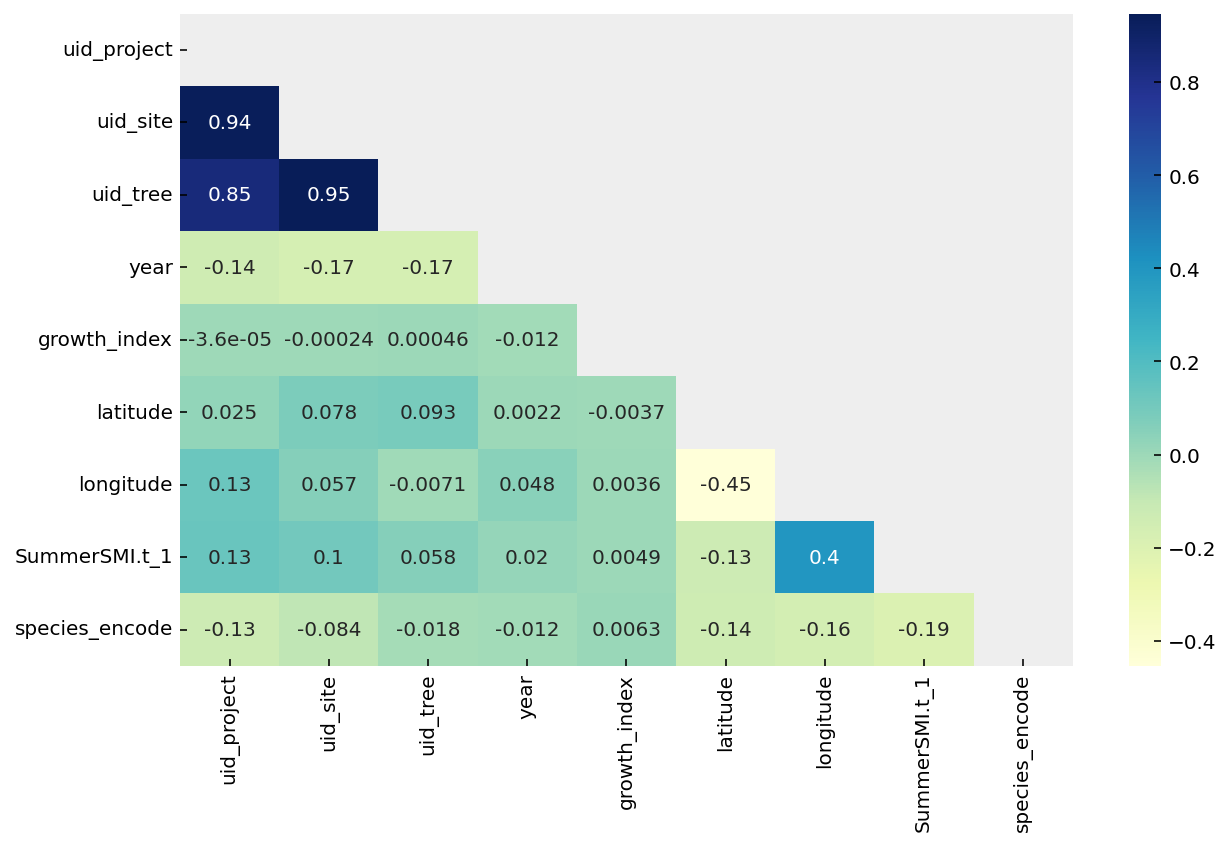

In [38]:
corr= df_int_norm.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask
corr_mean=sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=matrix)

In [39]:
df_int_norm.isnull().sum()

uid_project          0
uid_site             0
uid_tree             0
year                 0
growth_index         0
latitude          1070
longitude         1070
SummerSMI.t_1        0
species_encode       0
dtype: int64

In [40]:
df_int_norm=df_int_norm.dropna()
df_int_norm.isnull().sum()

uid_project       0
uid_site          0
uid_tree          0
year              0
growth_index      0
latitude          0
longitude         0
SummerSMI.t_1     0
species_encode    0
dtype: int64

In [41]:
z = np.abs(stats.zscore(df_int_norm))

In [42]:
data_clean_yearfit = df_int_norm[(z<3).all(axis=1)]

In [43]:
from sklearn.decomposition import PCA

In [51]:
data_clean_yearfit

,uid_project,uid_site,uid_tree,year,growth_index,latitude,longitude,SummerSMI.t_1,species_encode
0,0.647018,0.790704,0.200021,-1.706284,0.814134,-0.919789,-0.971355,-0.284455,-2.901974
1,0.647018,0.790704,0.200021,-1.645187,-2.548578,-0.919789,-0.971355,-0.739937,-2.901974
2,0.647018,0.790704,0.200021,-1.584090,0.267814,-0.919789,-0.971355,-0.039410,-2.901974
3,0.647018,0.790704,0.200021,-1.522993,0.797754,-0.919789,-0.971355,0.231312,-2.901974
5,0.647018,0.790704,0.200021,-1.400799,1.834510,-0.919789,-0.971355,0.502591,-2.901974
...,...,...,...,...,...,...,...,...,...
1633821,-0.180113,-0.348940,-0.548096,1.592956,-2.272045,-2.214649,1.059803,0.636557,2.313559
1633822,-0.180113,-0.348940,-0.548028,1.409665,-0.071348,-2.214649,1.059803,0.240243,2.313559
1633823,-0.180113,-0.348940,-0.548028,1.470762,-0.374859,-2.214649,1.059803,0.268152,2.313559
1633824,-0.180113,-0.348940,-0.548028,1.531859,-0.768942,-2.214649,1.059803,0.519337,2.313559


In [52]:
pca = PCA()

In [53]:
df_int_norm= pca.fit_transform(df_int_norm)

In [54]:
pca.components_.shape

(9, 9)

In [55]:
df_int_norm.shape

(1632756, 9)

In [56]:
pca.explained_variance_ratio_

array([0.32279441, 0.18913219, 0.1280579 , 0.11128739, 0.10502859,
       0.07839478, 0.04746902, 0.0151639 , 0.00267182])

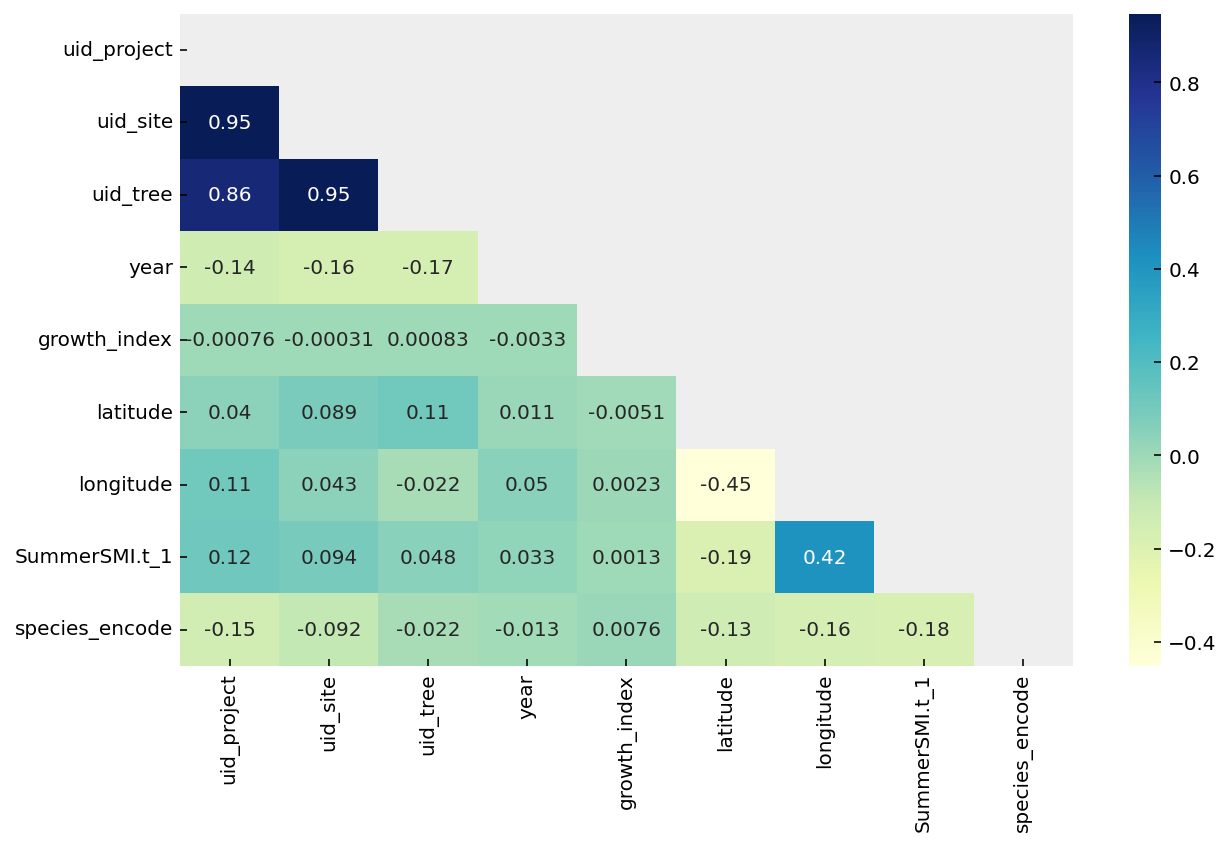

In [58]:
corr= data_clean_yearfit.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask
corr_mean=sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=matrix)


In [59]:
df_int_norm.shape

(1632756, 9)

In [60]:
df_recent_data = pd.DataFrame(df_recent_data, columns=df_int.columns)

In [62]:

data_clean1=data_clean_yearfit.iloc[:,5:7]

In [63]:
def dummy_creator(arr, pre):
    arr_dummy = pd.get_dummies(arr, prefix=pre, drop_first=True)
    return arr_dummy

In [ ]:
import plotly.express as px

In [ ]:
#fig = px.scatter_geo(data_clean,lat='latitude',lon='longitude')
#fig.show()
data_clean.isnull().sum()

uid_project       0
uid_site          0
uid_tree          0
year              0
growth_index      0
latitude          0
longitude         0
SummerSMI.t_1     0
species_encode    0
dtype: int64

In [ ]:
fig = px.density_mapbox(df_recent_data,lat='latitude',lon='longitude',mapbox_style='stamen-terrain',zoom=3,radius=1)
fig.show()

In [ ]:
clusters = range(1, 10)

In [ ]:
#df_cleaned_recent = data_.loc[data_clean['year'] > 2000, ['year','growth_index','species_encode','latitude','longitude','SummerSMI.t_1']]
#df_cleaned_recent

,year,growth_index,species_encode,latitude,longitude,SummerSMI.t_1


In [64]:
df_int.isnull().sum()
df_cleane=df_int.dropna()

In [65]:
df_cleaned_recent = df_cleane.loc[df_cleane['year'] > 2010, ['year','growth_index','species_encode','latitude','longitude','SummerSMI.t_1']]
df_cleaned_recent

,year,growth_index,species_encode,latitude,longitude,SummerSMI.t_1
2423,2011,0.809,0,49.83,-116.44,94.22
2424,2012,1.288,0,49.83,-116.44,96.12
2425,2013,-0.783,0,49.83,-116.44,95.50
2426,2014,0.972,0,49.83,-116.44,92.63
2427,2015,-0.021,0,49.83,-116.44,89.09
...,...,...,...,...,...,...
759403,2012,1.153,65,45.24,-76.27,87.20
759404,2013,-0.053,65,45.24,-76.27,69.40
759405,2014,-0.403,65,45.24,-76.27,97.70
759638,2011,-0.712,65,44.15,-79.12,89.90


In [66]:
df_scaled = StandardScaler().fit_transform(df_cleane)
df_scaled

array([[ 0.64664386,  0.79005897,  0.19940597, ..., -0.97135487,
        -0.28499795, -2.90152295],
       [ 0.64664386,  0.79005897,  0.19940597, ..., -0.97135487,
        -0.74062139, -2.90152295],
       [ 0.64664386,  0.79005897,  0.19940597, ..., -0.97135487,
        -0.039877  , -2.90152295],
       ...,
       [-0.18023671, -0.34953737, -0.54860638, ...,  1.05980265,
         0.2677805 ,  2.3144568 ],
       [-0.18023671, -0.34953737, -0.54860638, ...,  1.05980265,
         0.51904342,  2.3144568 ],
       [-0.18023671, -0.34953737, -0.54860638, ...,  1.05980265,
         0.63629946,  2.3144568 ]])

In [67]:
df_scaled = pd.DataFrame(df_scaled, columns=df_cleane.columns)
df_scaled

,uid_project,uid_site,uid_tree,year,growth_index,latitude,longitude,SummerSMI.t_1,species_encode
0,0.646644,0.790059,0.199406,-1.706237,0.814078,-0.919789,-0.971355,-0.284998,-2.901523
1,0.646644,0.790059,0.199406,-1.645141,-2.548321,-0.919789,-0.971355,-0.740621,-2.901523
2,0.646644,0.790059,0.199406,-1.584044,0.267808,-0.919789,-0.971355,-0.039877,-2.901523
3,0.646644,0.790059,0.199406,-1.522947,0.797699,-0.919789,-0.971355,0.230929,-2.901523
4,0.646644,0.790059,0.199406,-1.461850,3.021314,-0.919789,-0.971355,0.144382,-2.901523
...,...,...,...,...,...,...,...,...,...
1632751,-0.180237,-0.349537,-0.548674,1.592994,-2.271814,-2.214649,1.059803,0.636299,2.314457
1632752,-0.180237,-0.349537,-0.548606,1.409703,-0.071322,-2.214649,1.059803,0.239862,2.314457
1632753,-0.180237,-0.349537,-0.548606,1.470800,-0.374805,-2.214649,1.059803,0.267780,2.314457
1632754,-0.180237,-0.349537,-0.548606,1.531897,-0.768851,-2.214649,1.059803,0.519043,2.314457


In [68]:
sse = [] # an empty list to store sum of squared errors values
for c in clusters:
    cluster = KMeans(n_clusters=c)
    cluster.fit_predict(df_scaled)
    sse.append(cluster.inertia_)

NameError: name 'clusters' is not defined

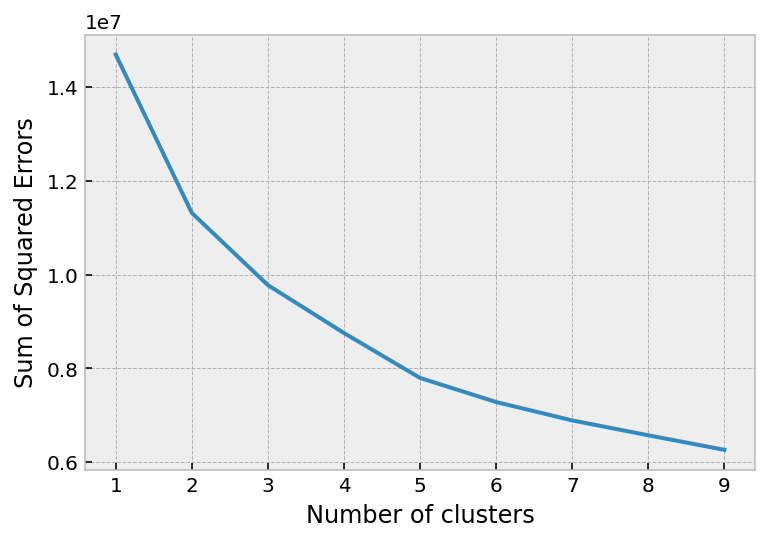

In [ ]:
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors")
plt.plot(clusters, sse)
plt.show()

In [69]:
cluster = KMeans(n_clusters=2)

In [70]:
cluster.fit(df_scaled)

KMeans(n_clusters=2)

In [71]:
labels = cluster.labels_

In [72]:
db=davies_bouldin_score(df_scaled, labels)

In [73]:
df_scaled["clusters"] = labels

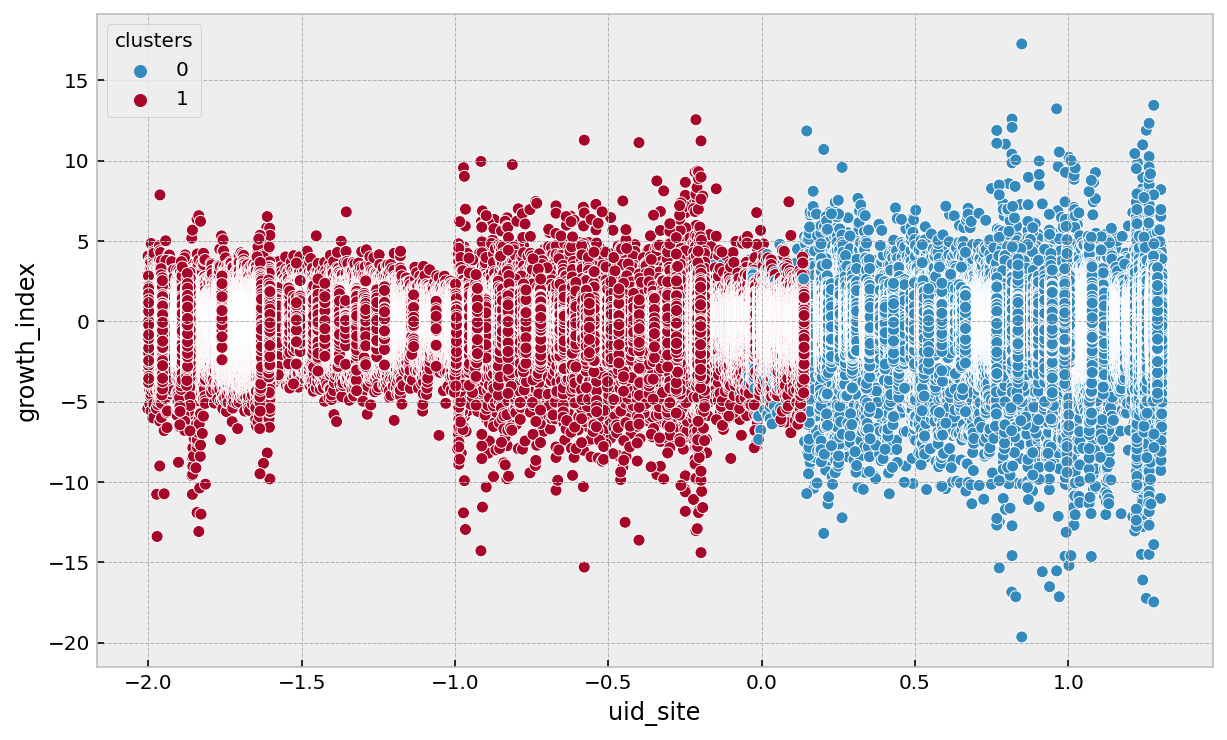

In [74]:
sns.scatterplot(x="uid_site", y="growth_index", hue="clusters", data=df_scaled);

In [75]:
#takes too much time to compute only run if necessary
results = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(df_scaled)
    db_index = davies_bouldin_score(df_scaled, labels)
    results.update({i: db_index})

KeyboardInterrupt: 

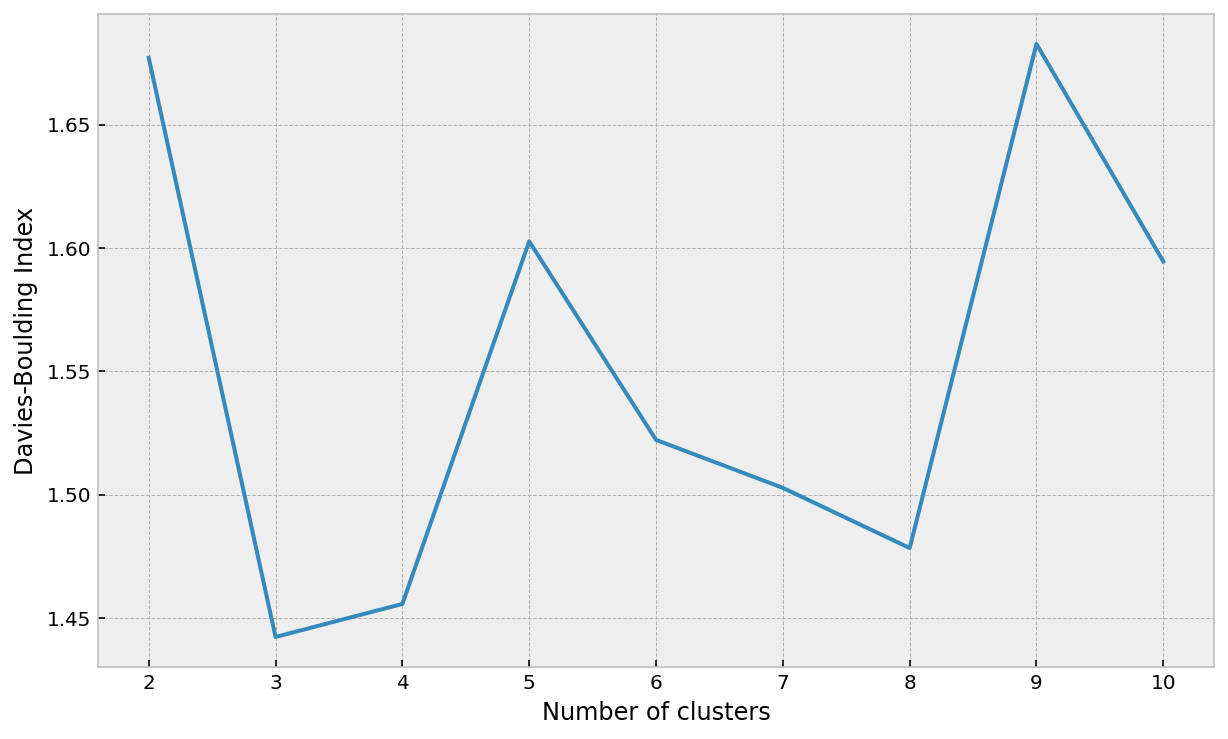

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

c:\Users\ACER\Documents\databases\anaconda2\envs\stream\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


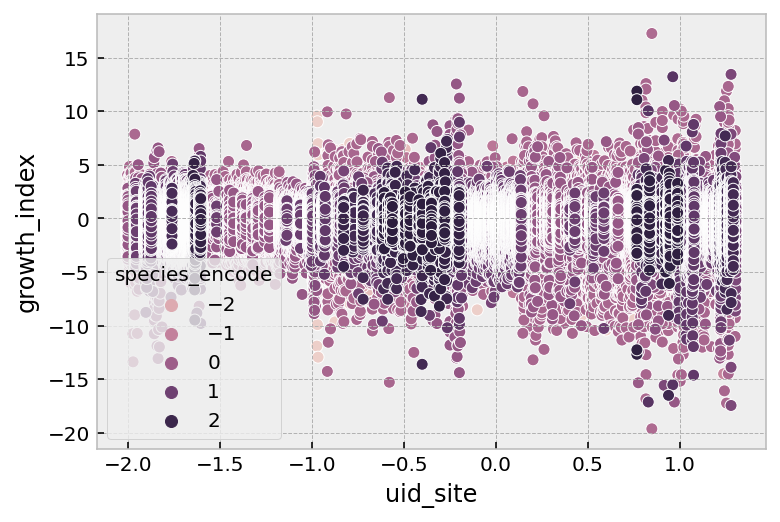

In [ ]:
sns.scatterplot(x="uid_site", y="growth_index", hue="species_encode", data=df_scaled);

In [51]:
df_scaled['species_encode'].unique()

array([-2.90152295, -2.82127711, -2.74103126, -2.66078542, -2.58053958,
       -2.50029374, -2.4200479 , -2.33980205, -2.25955621, -2.17931037,
       -2.09906453, -2.01881868, -1.93857284, -1.858327  , -1.77808116,
       -1.69783532, -1.61758947, -1.45709779, -1.37685195, -1.2966061 ,
       -1.53734363, -1.21636026, -1.13611442, -1.05586858, -0.97562274,
       -0.89537689, -0.81513105, -0.73488521, -0.65463937, -0.57439352,
       -0.49414768, -0.41390184, -0.333656  , -0.25341016, -0.17316431,
       -0.09291847, -0.01267263,  0.06757321,  0.14781906,  0.2280649 ,
        0.30831074,  0.38855658,  0.46880242,  0.54904827,  0.62929411,
        0.70953995,  0.78978579,  0.87003164,  0.95027748,  1.03052332,
        1.11076916,  1.19101501,  1.27126085,  1.35150669,  1.43175253,
        1.51199837,  1.59224422,  1.67249006,  1.7527359 ,  1.83298174,
        1.91322759,  1.99347343,  2.07371927,  2.15396511,  2.23421095,
        2.3144568 ])

In [76]:
cluster = KMeans(n_clusters=3)

In [82]:
y_means=cluster.fit_predict(df_scaled)

In [83]:
labels = cluster.labels_

In [84]:
df_scaled["clusters9"] = labels

In [85]:
Cluster_1=df_scaled[df_scaled['clusters9']==0]
Cluster_2=df_scaled[df_scaled['clusters9']==1]
Cluster_3=df_scaled[df_scaled['clusters9']==2]


In [86]:
Cluster_1

,uid_project,uid_site,uid_tree,year,growth_index,latitude,longitude,SummerSMI.t_1,species_encode,clusters,clusters9
959,-1.742122,-1.633833,-1.267744,-1.706237,-0.240887,-0.939951,-0.882106,0.402346,-2.901523,1,0
960,-1.742122,-1.633833,-1.267744,-1.645141,0.079938,-0.939951,-0.882106,0.177884,-2.901523,1,0
961,-1.742122,-1.633833,-1.267744,-1.584044,-0.428757,-0.939951,-0.882106,0.397320,-2.901523,1,0
962,-1.742122,-1.633833,-1.267744,-1.522947,0.035620,-0.939951,-0.882106,0.465441,-2.901523,1,0
963,-1.742122,-1.633833,-1.267744,-1.461850,0.005753,-0.939951,-0.882106,0.571529,-2.901523,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1632744,-0.180237,-0.349537,-0.548811,1.409703,1.419117,-2.214649,1.059803,0.239862,2.314457,1,0
1632748,-0.180237,-0.349537,-0.548674,1.409703,-0.288095,-2.214649,1.059803,0.239862,2.314457,1,0
1632749,-0.180237,-0.349537,-0.548674,1.470800,0.213856,-2.214649,1.059803,0.267780,2.314457,1,0
1632752,-0.180237,-0.349537,-0.548606,1.409703,-0.071322,-2.214649,1.059803,0.239862,2.314457,1,0


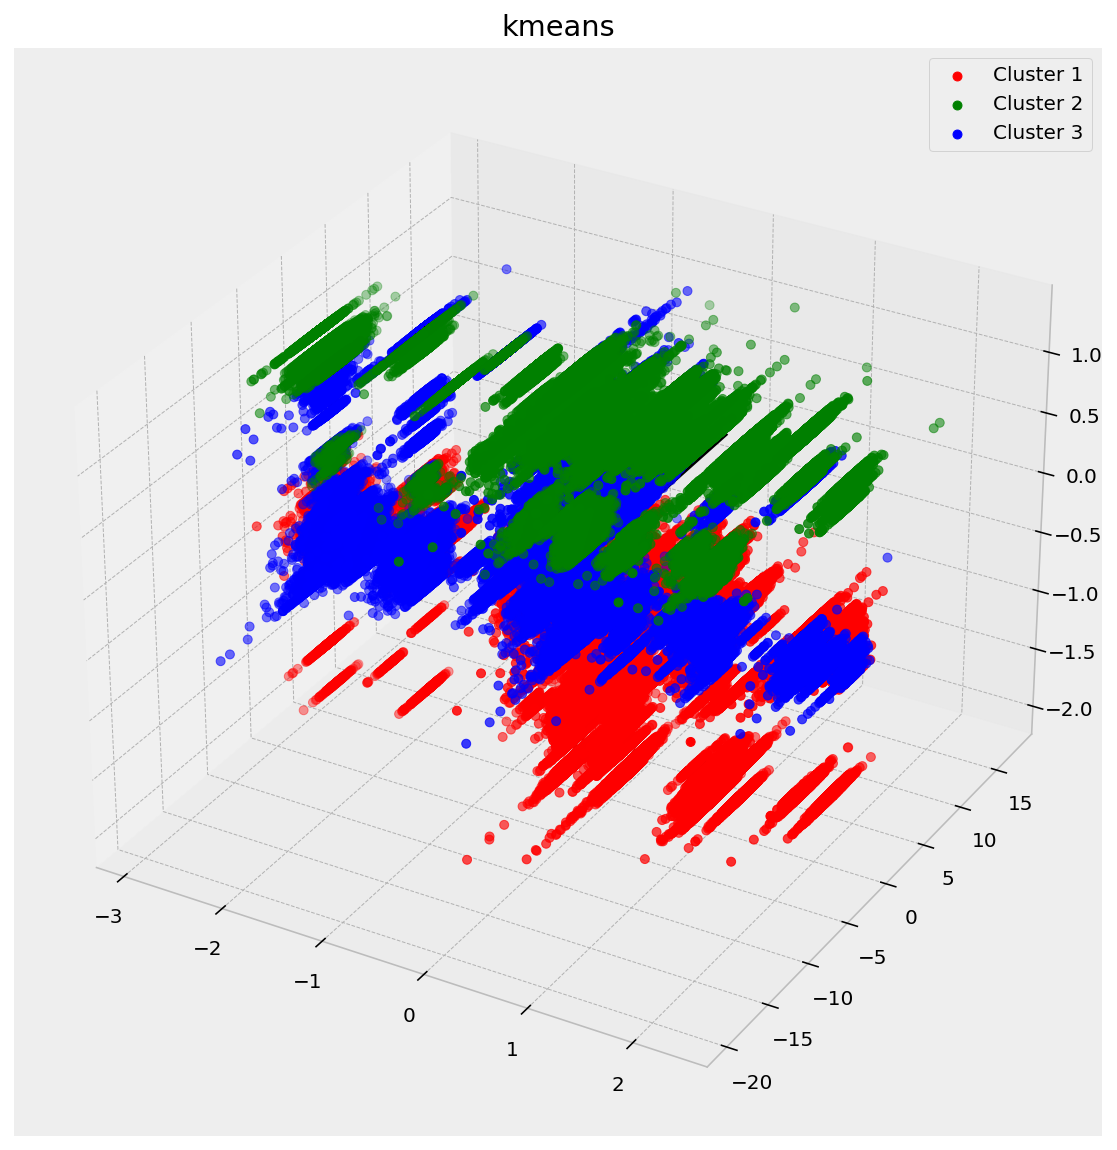

In [87]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(10,10))

kplot=plt.axes(projection='3d')
xline= np.linspace(0,1,2)
yline=np.linspace(0,1,2)
zline=np.linspace(0,1,2)

kplot.plot3D(xline, yline, zline, 'black')

kplot.scatter3D(Cluster_1.species_encode,Cluster_1.growth_index,Cluster_1.uid_site, c='red',label = 'Cluster 1')
kplot.scatter3D(Cluster_2.species_encode,Cluster_2.growth_index,Cluster_2.uid_site,c='green',label = 'Cluster 2')
kplot.scatter3D(Cluster_3.species_encode,Cluster_3.growth_index,Cluster_3.uid_site,c='blue',label = 'Cluster 3')


plt.legend()
plt.title("kmeans")
plt.show()

C:\Users\ACER\Documents\databases\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


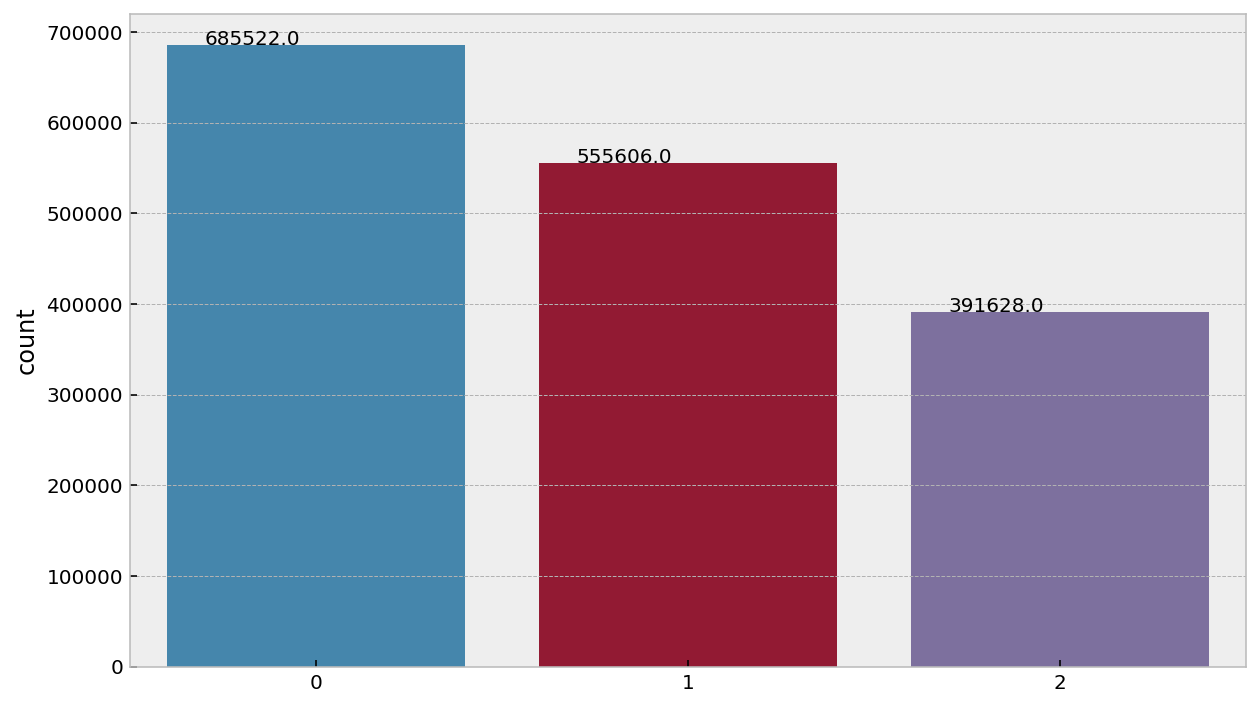

In [89]:
ax = sns.countplot(y_means)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

In [91]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score

In [94]:
silhouette_score(df_scaled,labels)

KeyboardInterrupt: 